In [84]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

#### Описание данных

В папке Data находится информация о студентах. Всего 10 групп студентов. Файлы делятся на две категории:  
    * Students_info_i - информация о студентах из группы i  
    * Students_marks_i - оценки студентов из группы i за экзамены

### Одно из важных достоинств pandas $-$ это удобные методы реляционного взаимодействия с данными, аналогичные, например, возможностям SQL для слияния и конкатенации таблиц: merge, join, concat. Наличие готовых методов позволяет не реализовывать самостоятельно поэлементную обработку данных и оперировать сразу целыми таблицами данных.

Подробно об этих методах посмотрите тут: https://www.kaggle.com/residentmario/renaming-and-combining#Combining

#### Задание 1. Соберите всю информацию о студентах в одну таблицу df. В получившейся таблице должна быть информация и оценки всех студентов из всех групп. Напечатайте несколько строк таблицы для демонстрации результата.¶
* Пройтись по файлам;
* Каждый файл прочитать;
* Соединить с помощью `pd.concat`.

In [25]:
from glob import glob

In [29]:
glob("./Data/*marks*.csv") # регулярные выражения

['./Data\\Students_marks_0.csv',
 './Data\\Students_marks_1.csv',
 './Data\\Students_marks_2.csv',
 './Data\\Students_marks_3.csv',
 './Data\\Students_marks_4.csv',
 './Data\\Students_marks_5.csv',
 './Data\\Students_marks_6.csv',
 './Data\\Students_marks_7.csv',
 './Data\\Students_marks_8.csv',
 './Data\\Students_marks_9.csv']

In [17]:
info_dfs = []
marks_dfs = []

for i in range(10):
    info = pd.read_csv(f"./Data/Students_info_{i}.csv", sep=',', index_col=0)
    info_dfs.append(info)

    marks = pd.read_csv(f"./Data/Students_marks_{i}.csv", sep=',', index_col=0)
    marks_dfs.append(marks)

In [24]:
# pd.concat([pd.read_csv(f"./Data/Students_info_{i}.csv", sep=',', index_col=0) for i in range(10)])

In [18]:
marks = pd.concat(marks_dfs)
info = pd.concat(info_dfs)

In [19]:
info.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group
index,,,,,,
0,female,group B,bachelor's degree,standard,none,group1
1,female,group C,some college,standard,completed,group1
2,female,group B,master's degree,standard,none,group1
3,male,group A,associate's degree,free/reduced,none,group1
4,male,group C,some college,standard,none,group1


In [20]:
marks.head()

,math score,reading score,writing score
index,,,
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [21]:
data = info.join(marks)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
index,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,group10,88,99,95
996,male,group C,high school,free/reduced,none,group10,62,55,55
997,female,group C,high school,free/reduced,completed,group10,59,71,65


In [30]:
#your code here
data = data.reset_index()
data.head()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,1,female,group C,some college,standard,completed,group1,69,90,88
2,2,female,group B,master's degree,standard,none,group1,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,4,male,group C,some college,standard,none,group1,76,78,75


#### Задание 2. Удалите столбец index у полученной таблицы. Напечатайте первые 10 строк таблицы.

In [34]:
#your code here
#data = data.drop(columns=['index'])
data = data.drop(['index'], axis=1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75


#### Задание 3. Выведите на экран размеры полученной таблицы

In [35]:
# your code here
data.shape

(1000, 9)

#### Задание 4. Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [37]:
# your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [49]:
data[['math score', 'reading score', 'writing score']].agg([np.min, np.max, np.mean, np.std]).round(1).T

,min,max,mean,std
math score,0.0,100.0,66.1,15.2
reading score,17.0,100.0,69.2,14.6
writing score,10.0,100.0,68.1,15.2


#### Задание 5. Проверьте, есть ли в таблице пропущенные значения

In [53]:
# your code here
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
group                          0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Задание 6. Выведите на экран средние баллы студентов по каждому предмету (math, reading, writing)

In [56]:
# your code here
data[['math score', 'reading score', 'writing score']].mean().round()

math score       66.0
reading score    69.0
writing score    68.0
dtype: float64

In [58]:
CIdata = data[['math score', 'reading score', 'writing score']].agg(['mean', 'std']).T
CIdata

,mean,std
math score,66.089,15.163080
reading score,69.169,14.600192
writing score,68.054,15.195657


In [59]:
CIdata['SE'] = CIdata['std'] / np.sqrt(1000)
CIdata

,mean,std,SE
math score,66.089,15.163080,0.479499
reading score,69.169,14.600192,0.461699
writing score,68.054,15.195657,0.480529


In [64]:
alpha = 0.01
quantile = 1 - alpha / 2
q_func = stats.norm().ppf(quantile)
q_func

2.5758293035489004

In [65]:
CIdata['margin'] = CIdata['SE'] * q_func
CIdata['left'] = CIdata['mean'] - CIdata['margin']
CIdata['right'] = CIdata['mean'] + CIdata['margin']

In [66]:
CIdata

,mean,std,SE,margin,left,right
math score,66.089,15.163080,0.479499,1.235107,64.853893,67.324107
reading score,69.169,14.600192,0.461699,1.189257,67.979743,70.358257
writing score,68.054,15.195657,0.480529,1.237760,66.816240,69.291760


In [75]:
stats.norm.interval(0.99, loc=66.089, scale=0.479499)

(64.8538924247776, 67.3241075752224)

In [67]:
# доверительный интервал для разницы математики и чтения

In [74]:
CIdata = (data['math score'] - data['reading score']).agg(['mean', 'std']).to_frame().T
stats.norm.interval(0.99, loc=-3.08, scale=9.004815 / np.sqrt(1000))

(-3.813486076893123, -2.346513923106877)

In [126]:
stats.norm.sf(1.797) * 2 

0.07233561976008493

In [121]:
stats.norm.sf(1.7).round(4)

0.0446

In [122]:
(69.17 - 70) / 14.6 * np.sqrt(1000)

-1.7977331903696914

**Задание 7. Как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (test preparation course)? Выведите на экран для каждого предмета в отдельности средний балл студентов, проходивших курс для подготовки к экзамену и не проходивших курс.**

In [127]:
# your code here
data.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().round(1)

KeyError: 'test preparation course'

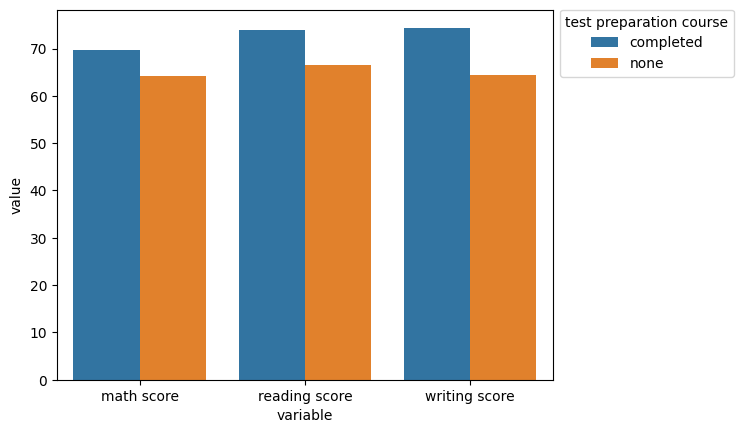

In [93]:
pic_data = (
    data
    .groupby('test preparation course', as_index=False)
    [['math score', 'reading score', 'writing score']]
    .mean()
    .round(1)
    .melt(id_vars='test preparation course')
)

g = sns.barplot(pic_data, x='variable', y='value', hue='test preparation course')
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1.02))

<Axes: xlabel='variable', ylabel='value'>

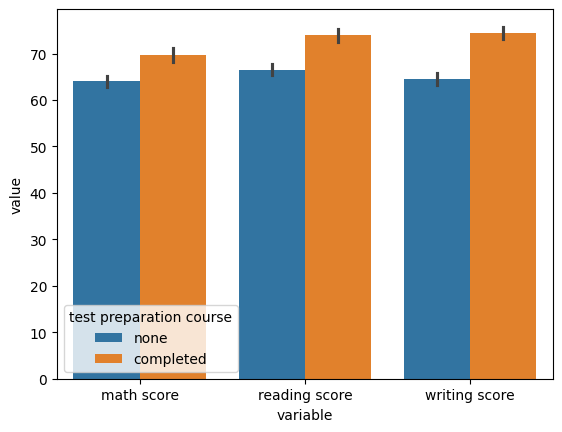

In [96]:
sns.barplot(
    data.melt(id_vars='test preparation course', value_vars=['math score', 'reading score', 'writing score']),
    x='variable',
    y='value',
    hue='test preparation course'
)

**Задание 8. Выведите на экран все различные значения из столбца lunch.**

In [97]:
# your code here
data.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

**Задание 9. Переименуйте колонку "parental level of education" в "education", а "test preparation course" в "test preparation" с помощью метода pandas rename**
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [98]:
# your code here
data = data.rename(columns={
    "parental level of education": "education", 
    "test preparation course": "test preparation"
})
data

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,group10,88,99,95
996,male,group C,high school,free/reduced,none,group10,62,55,55
997,female,group C,high school,free/reduced,completed,group10,59,71,65
998,female,group D,some college,standard,completed,group10,68,78,77


In [133]:
data.groupby('test preparation')['math score'].agg(['mean', 'std', 'count', 'var']).round(1).T

test preparation,completed,none
mean,69.7,64.1
std,14.4,15.2
count,358.0,642.0
var,208.6,230.8


In [135]:
z_stat = (69.7 - 64.1) / np.sqrt( 208.6/358 + 230.8/642 )
z_stat

5.769263393552112

In [140]:
stats.norm().sf(z_stat) # p-value

3.980938932937194e-09

In [144]:
a = data[data['test preparation'] == 'completed']['math score'].values 
b = data[data['test preparation'] == 'none']['math score'].values 

In [146]:
stats.ttest_ind(a, b, equal_var=False, alternative='greater')

TtestResult(statistic=5.786983157907755, pvalue=5.212808361034757e-09, df=770.0791097809667)

**Зафиксируем минимальный балл для сдачи экзамена**

In [99]:
passmark = 50

**Задание 10. Ответьте на вопросы:**  
    * Какая доля студентов сдала экзамен по математике (passmark > 50)?  
    * Какая доля студентов, проходивших курс подготовки к экзамену, сдала экзамен по математике?  
    * Какая доля женщин, не проходивших курс подготовки к экзамену, не сдала экзамен по математике?  

In [101]:
# your code here
(data['math score'] >= passmark).mean().round(2)

0.86

In [109]:
# 
data[data['test preparation'] == 'completed']['math score'].ge(passmark).mean().round(3)

0.922

In [110]:
data[data['test preparation'] == 'none']['math score'].ge(passmark).mean().round(3)

0.833

In [112]:
data.groupby('test preparation')['math score'].apply(lambda x: (x >= passmark).mean().round(3))

test preparation
completed    0.922
none         0.833
Name: math score, dtype: float64

**Задание 11. С помощью groupby выполните задания ниже. Также выведите время выполнения каждого из заданий.**
    * Для каждой этнической группы выведите средний балл за экзамен по чтению
    * Для каждого уровня образования выведите минимальный балл за экзамен по письму

In [ ]:
# your code here

**Задание 12. Выполните задание 11 с помощью циклов. Сравните время выполнения.**

In [ ]:
# your code here

**Задание 13. Выведите на экран средние баллы студентов по каждому предмету в зависимости от пола и уровня образования. То есть должно получиться количество групп, равных 2 * (число уровней образования), и для каждой такой группы выыведите средний балл по каждому из предметов.**

Это можно сделать с помощью сводных таблиц (pivot_table):

https://www.kaggle.com/kamilpolak/tutorial-how-to-use-pivot-table-in-pandas

In [ ]:
# your code here

#### Задание 14. Сколько студентов успешно сдали экзамен по математике?

Создайте новый столбец в таблице df под названием Math_PassStatus и запишите в него F, если студент не сдал экзамен по математике (балл за экзамен < passmark), и P иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

Сделайте аналогичные шаги для экзаменов по чтению и письму.

In [ ]:
# your code here

#### Задание 15. Сколько студентов успешно сдали все экзамены?

Создайте столбец OverAll_PassStatus и запишите в него для каждого студента 'F', если студент не сдал хотя бы один из трех экзаменов, а иначе 'P'.

Посчитайте количество студентов, которые сдали все экзамены.

In [ ]:
# your code here

#### Задание 16. Переведем баллы в оценки

### Система перевода баллов в оценки
####      [90;100] = A
####      [80;90) = B
####      [70;80) = C
####      [60;70) = D
####      [50;60) = E
####      [0;50) = F (Fail)

Создайте вспомогательную функцию, которая будет по среднему баллу за три экзамена выставлять оценку студенту по данным выше критериям.

Создайте столбец Grade и запишите в него оценку каждого студента.

Выведите количество студентов, получивших каждую из оценок.

In [ ]:
def GetGrade(average_mark):
    # your code here    

# your code here